## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

W0811 11:42:09.880149 11672 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 11:42:09.952951 11672 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 11:42:09.962924 11672 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


W0811 11:42:10.189979 11672 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 11:42:10.211277 11672 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500,
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0811 11:42:10.469555 11672 deprecation.py:323] From C:\Users\Trenton\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 11:42:10.559688 11672 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.2398 - acc: 0.1602 - val_loss: 2.1858 - val_acc: 0.1952
Epoch 2/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.1491 - acc: 0.2227 - val_loss: 2.1192 - val_acc: 0.2476
Epoch 3/500
50000/50000 [==============================] - 5s 95us/step - loss: 2.0924 - acc: 0.2560 - val_loss: 2.0704 - val_acc: 0.2730
Epoch 4/500
50000/50000 [==============================] - 4s 85us/step - loss: 2.0489 - acc: 0.2771 - val_loss: 2.0314 - val_acc: 0.2850
Epoch 5/500
50000/50000 [==============================] - 4s 90us/step - loss: 2.0146 - acc: 0.2896 - val_loss: 2.0005 - val_acc: 0.2972
Epoch 6/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.9867 - acc: 0.3011 - val_loss: 1.9752 - val_acc: 0.3062
Epoch 7/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.9631 - acc: 0.3111 - val_loss: 1.9547 -

50000/50000 [==============================] - 4s 72us/step - loss: 1.6426 - acc: 0.4279 - val_loss: 1.6526 - val_acc: 0.4219
Epoch 60/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.6394 - acc: 0.4294 - val_loss: 1.6484 - val_acc: 0.4246
Epoch 61/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.6362 - acc: 0.4299 - val_loss: 1.6486 - val_acc: 0.4217
Epoch 62/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.6338 - acc: 0.4306 - val_loss: 1.6454 - val_acc: 0.4258
Epoch 63/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6306 - acc: 0.4324 - val_loss: 1.6430 - val_acc: 0.4269
Epoch 64/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.6276 - acc: 0.4339 - val_loss: 1.6403 - val_acc: 0.4260
Epoch 65/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.6247 - acc: 0.4339 - val_loss: 1.6370 - val_acc: 0.4278
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5010 - acc: 0.4772 - val_loss: 1.5322 - val_acc: 0.4574
Epoch 119/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4990 - acc: 0.4787 - val_loss: 1.5307 - val_acc: 0.4572
Epoch 120/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.4967 - acc: 0.4786 - val_loss: 1.5298 - val_acc: 0.4563
Epoch 121/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.4949 - acc: 0.4803 - val_loss: 1.5272 - val_acc: 0.4567
Epoch 122/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4935 - acc: 0.4791 - val_loss: 1.5310 - val_acc: 0.4588
Epoch 123/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.4910 - acc: 0.4803 - val_loss: 1.5257 - val_acc: 0.4599
Epoch 124/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.4894 - acc: 0.4809 - val_loss: 1.5239 - val_acc: 0.4611
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 73us/step - loss: 1.4042 - acc: 0.5098 - val_loss: 1.4615 - val_acc: 0.4807
Epoch 177/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.4020 - acc: 0.5109 - val_loss: 1.4642 - val_acc: 0.4789
Epoch 178/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.4003 - acc: 0.5115 - val_loss: 1.4589 - val_acc: 0.4803
Epoch 179/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3990 - acc: 0.5122 - val_loss: 1.4621 - val_acc: 0.4800
Epoch 180/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.3982 - acc: 0.5129 - val_loss: 1.4587 - val_acc: 0.4806
Epoch 181/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.3955 - acc: 0.5130 - val_loss: 1.4589 - val_acc: 0.4795
Epoch 182/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.3943 - acc: 0.5125 - val_loss: 1.4751 - val_acc: 0.4764
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 4s 70us/step - loss: 1.3218 - acc: 0.5373 - val_loss: 1.4238 - val_acc: 0.4929
Epoch 235/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3203 - acc: 0.5387 - val_loss: 1.4257 - val_acc: 0.4925
Epoch 236/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3189 - acc: 0.5375 - val_loss: 1.4246 - val_acc: 0.4960
Epoch 237/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3181 - acc: 0.5389 - val_loss: 1.4104 - val_acc: 0.4998
Epoch 238/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3165 - acc: 0.5411 - val_loss: 1.4288 - val_acc: 0.4850
Epoch 239/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3153 - acc: 0.5413 - val_loss: 1.4151 - val_acc: 0.4942
Epoch 240/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.3141 - acc: 0.5399 - val_loss: 1.4161 - val_acc: 0.4980
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.2494 - acc: 0.5635 - val_loss: 1.3862 - val_acc: 0.5104
Epoch 293/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.2478 - acc: 0.5622 - val_loss: 1.3892 - val_acc: 0.5038
Epoch 294/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.2469 - acc: 0.5631 - val_loss: 1.3784 - val_acc: 0.5096
Epoch 295/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.2461 - acc: 0.5634 - val_loss: 1.3925 - val_acc: 0.5046
Epoch 296/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2436 - acc: 0.5646 - val_loss: 1.3933 - val_acc: 0.5057
Epoch 297/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2437 - acc: 0.5647 - val_loss: 1.3840 - val_acc: 0.5105
Epoch 298/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.2422 - acc: 0.5658 - val_loss: 1.3913 - val_acc: 0.5066
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 4s 73us/step - loss: 1.1817 - acc: 0.5884 - val_loss: 1.3733 - val_acc: 0.5182
Epoch 351/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.1800 - acc: 0.5871 - val_loss: 1.3576 - val_acc: 0.5143
Epoch 352/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.1792 - acc: 0.5873 - val_loss: 1.3922 - val_acc: 0.5055
Epoch 353/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1780 - acc: 0.5871 - val_loss: 1.3534 - val_acc: 0.5197
Epoch 354/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.1768 - acc: 0.5893 - val_loss: 1.3889 - val_acc: 0.5064
Epoch 355/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.1764 - acc: 0.5890 - val_loss: 1.3742 - val_acc: 0.5143
Epoch 356/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.1738 - acc: 0.5904 - val_loss: 1.3919 - val_acc: 0.5096
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 1.1195 - acc: 0.6091 - val_loss: 1.4291 - val_acc: 0.5067
Epoch 409/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1193 - acc: 0.6105 - val_loss: 1.3500 - val_acc: 0.5248
Epoch 410/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1160 - acc: 0.6113 - val_loss: 1.3779 - val_acc: 0.5117
Epoch 411/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1150 - acc: 0.6105 - val_loss: 1.3450 - val_acc: 0.5229
Epoch 412/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.1143 - acc: 0.6115 - val_loss: 1.3961 - val_acc: 0.5094
Epoch 413/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1127 - acc: 0.6115 - val_loss: 1.3450 - val_acc: 0.5283
Epoch 414/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1118 - acc: 0.6124 - val_loss: 1.3416 - val_acc: 0.5282
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 4s 78us/step - loss: 1.0583 - acc: 0.6313 - val_loss: 1.3405 - val_acc: 0.5304
Epoch 467/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.0554 - acc: 0.6330 - val_loss: 1.4534 - val_acc: 0.5035
Epoch 468/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.0570 - acc: 0.6327 - val_loss: 1.3618 - val_acc: 0.5205
Epoch 469/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.0554 - acc: 0.6337 - val_loss: 1.3669 - val_acc: 0.5205
Epoch 470/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.0551 - acc: 0.6337 - val_loss: 1.3446 - val_acc: 0.5296
Epoch 471/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.0520 - acc: 0.6344 - val_loss: 1.3450 - val_acc: 0.5246
Epoch 472/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.0511 - acc: 0.6336 - val_loss: 1.3547 - val_acc: 0.5240
Epoch 473/500
50000/50000 [=======

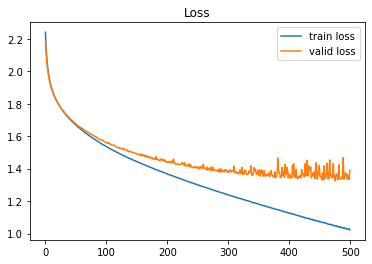

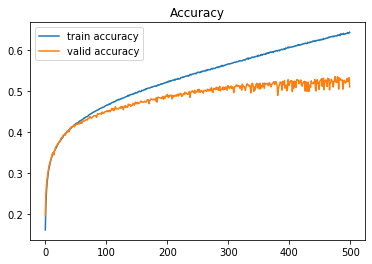

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()